In [6]:
import spotpy
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from setup import SIRB_Setup, Results, ResultsDept
from sirb import SIRB
import pandas as pd
import numpy as np
import random
import matplotlib.dates as mdates
plt.style.use('seaborn-notebook')

In [22]:
file_name = 'DREAM_norm_dept_100000_2017-11-21::00:41:21_a8.csv'
model_str = file_name.split('_')[1]
scale = file_name.split('_')[2]
n_chain = 4
calibration_data = pd.read_csv(file_name)
data = {}
for i in range(n_chain):
    data[i] = calibration_data.loc[calibration_data['chain'] == i].reset_index(drop=True)

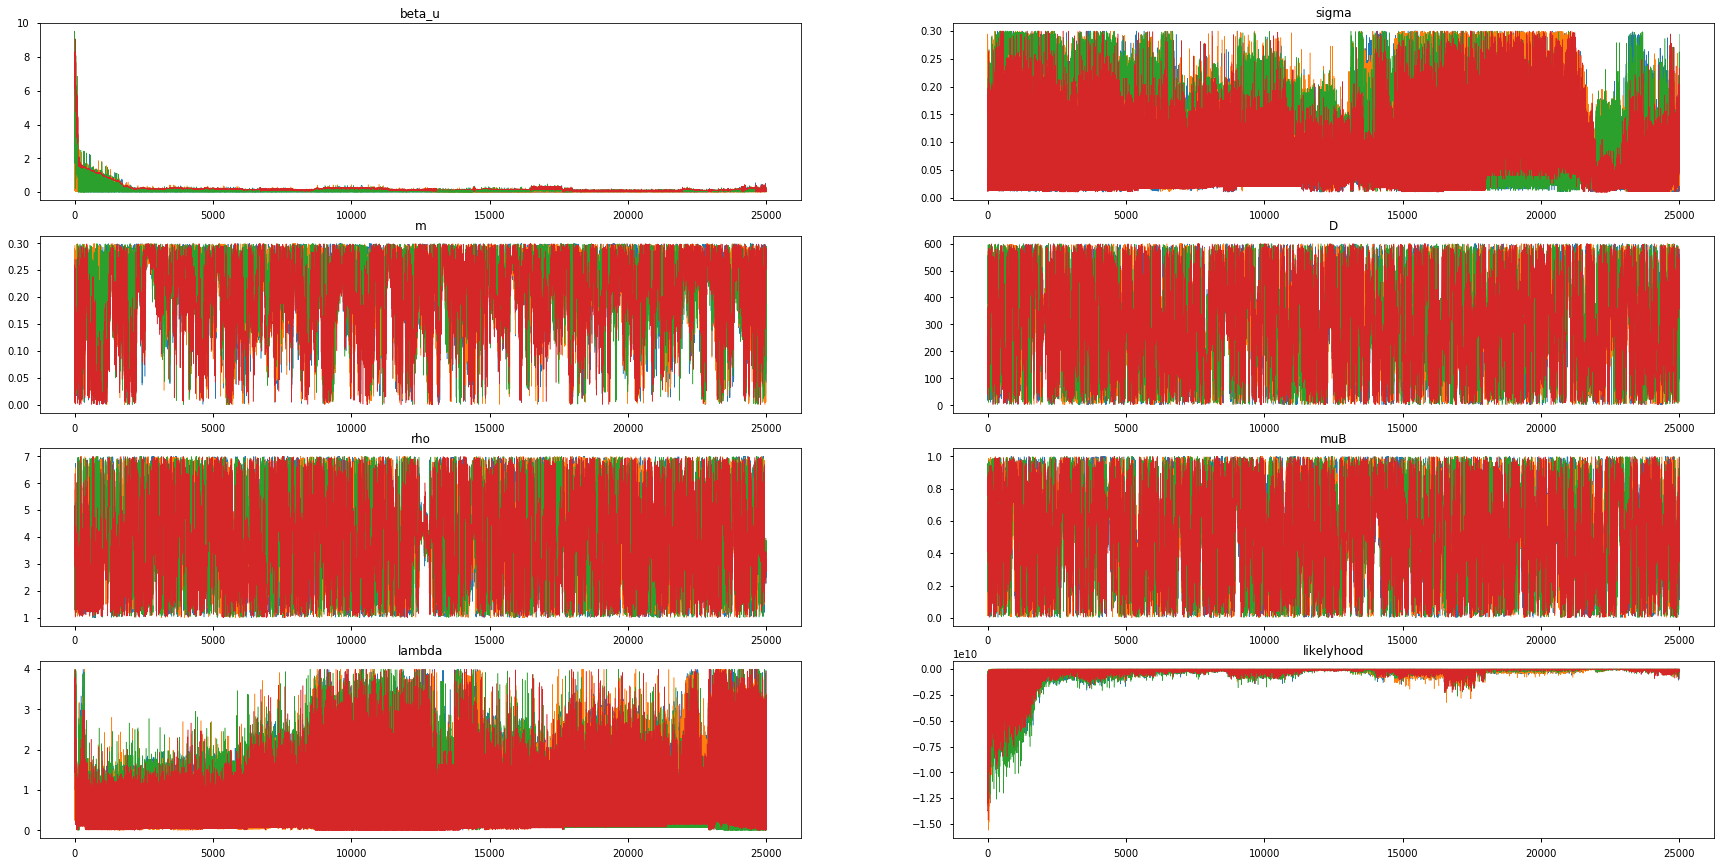

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(40,40), squeeze = True);
axes = axes.flatten();

last = 0

for c in range(n_chain):
    data[c]['parbeta_u'][-last:].plot(linewidth=0.5, figsize=(30,15), ax=axes[0], title = 'beta_u')
    data[c]['parsigma'][-last:].plot(linewidth=0.5, figsize=(30,15), ax=axes[1], title = 'sigma')
    data[c]['parm'][-last:].plot(linewidth=0.5, figsize=(30,15), ax=axes[2], title = 'm')
    data[c]['parD'][-last:].plot(linewidth=0.5, figsize=(30,15), ax=axes[3], title = 'D')
    data[c]['parrho'][-last:].plot(linewidth=0.5, figsize=(30,15), ax=axes[4], title = 'rho')
    data[c]['parmuB'][-last:].plot(linewidth=0.5, figsize=(30,15), ax=axes[5], title = 'muB')
    if ('norm' in model_str):
        data[c]['parlambda'][-last:].plot(linewidth=0.5, figsize=(30,15), ax=axes[6], title = 'lambda')
    data[c]['like1'][-last:].plot(linewidth=0.5, figsize=(30,15), ax=axes[7], title = 'likelyhood')

In [23]:
ensemble = {}
n = 1

setup = SIRB_Setup().model_dept()

setup.t1i = datetime.date(2010, 10, 24)
setup.t1f = datetime.date(2016, 8, 13) 
setup.t2f = datetime.date(2016, 12, 30)

#setup.t1f = datetime.date(2012, 5, 12)
#setup.t2f = datetime.date(2016, 8, 13)
#y0 = np.load('IC_' + model_str + '-' + scale + '.npy')
#y0[y0 < 0] = 0
#setup.y0 = y0

calibration_data.sort_values(by=['like1'], ascending=False, inplace = True)


for i in range(n):
    calibration_data.iloc[0]
    
    rea = i
    #rea = random.randint(4000,6500)
    
    setup.p.theta = 1
    setup.p.beta0 = calibration_data.iloc[rea].parbeta_u
    setup.p.sigma = calibration_data.iloc[rea].parsigma
    #setup.p.l = calibration_data.iloc[rea].parl
    setup.p.m = calibration_data.iloc[rea].parm
    setup.p.D = calibration_data.iloc[rea].parD
    setup.p.rho = calibration_data.iloc[rea].parrho
    #setup.p.sigma = calibration_data.iloc[rea].parsigma
    setup.muB = calibration_data.iloc[rea].parmuB
    
    
    if ('h2h' in model_str):
        setup.p.beta_h2h = calibration_data.iloc[rea].parbeta_h2h
    if ('norm' in model_str):
        setup.p.lam = calibration_data.iloc[rea].parlambda
    
    model = SIRB(setup, model_str)
    if scale == 'ws':
        ensemble[i]  = Results(model.run().y, setup)
    elif scale == 'dept':
        ensemble[i]  = ResultsDept(model.run().y, setup)
        


>>> Simulation done in  3.8121321201324463


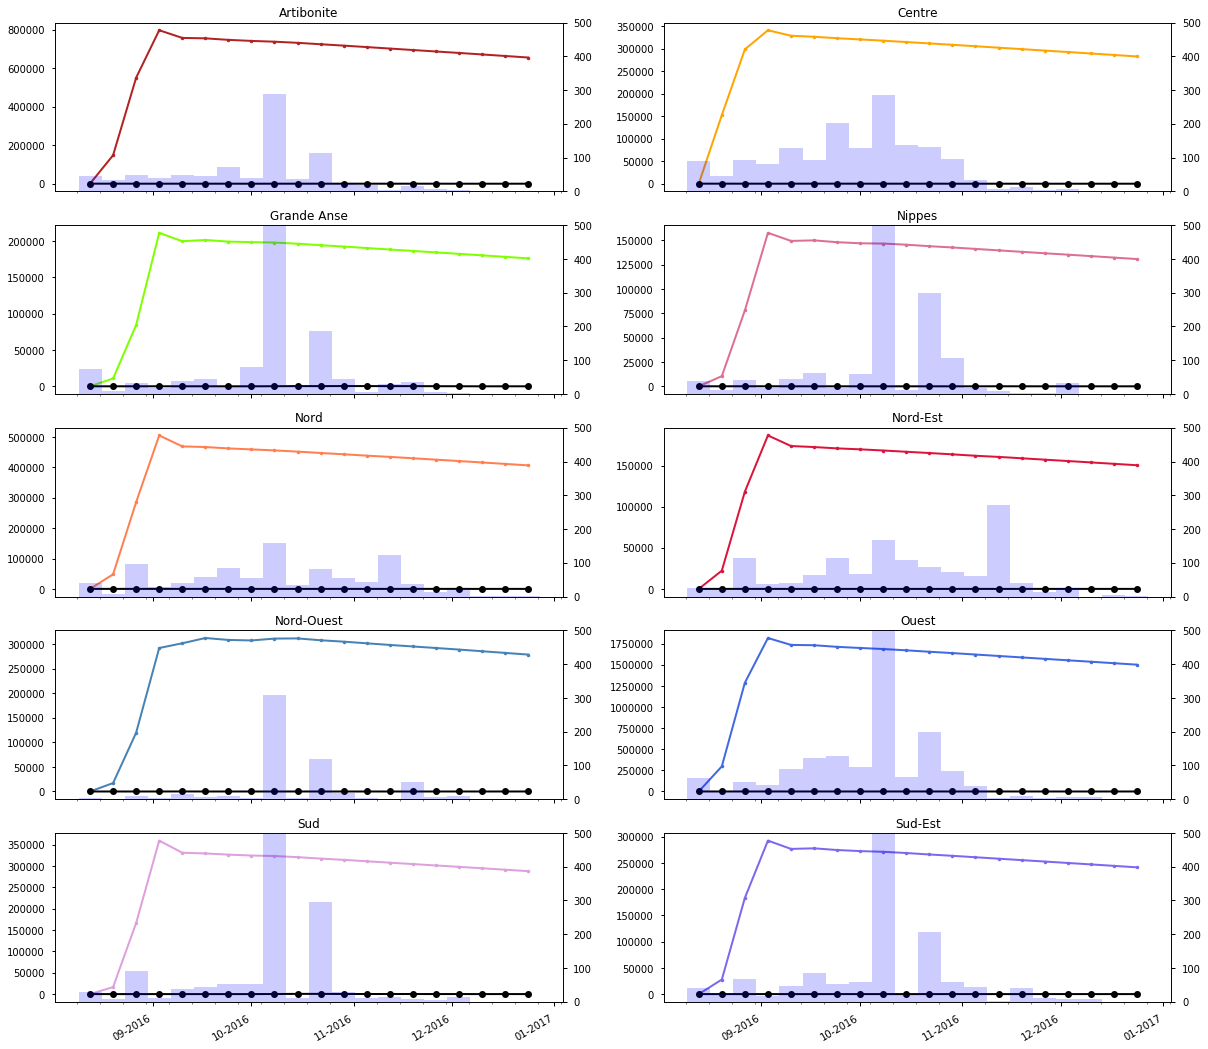

In [24]:
colors = ['firebrick', 'orange', 'chartreuse', 'palevioletred', 
          'coral', 'crimson', 'steelblue', 'royalblue', 'plum', 'mediumslateblue']

fig, axes = plt.subplots(5, 2, figsize=(20,20), squeeze = True);
axes = axes.flatten();

for i in range(10):
    axes[i].set_title(setup.geo.adm1_name[i])
    ax =  axes[i].twinx()
    ax.bar(pd.date_range(setup.t1f,setup.t2f, freq='W-SAT'), 
            setup.rainfall.resample('W-SAT').sum()[setup.t1f:setup.t2f].iloc[:,i], label = 'Rainfall', 
            color = 'blue', width=7, alpha = 0.2)
    #ax.bar(pd.date_range(setup.t1f,setup.t2f), 
    #        setup.rainfall[setup.t1f:setup.t2f].iloc[:,i], label = 'Rainfall', 
    #        color = 'blue', width=1, alpha = 0.2)
    ax.set_ylim(0,500)
   
    for ens in range(n):
        ensemble[ens].I_adm1_w.iloc[0] = setup.y0[setup.i.I]

        axes[i].plot(ensemble[ens].I_adm1_w[setup.t1f:setup.t2f].iloc[:,i], label = 'Simulation', 
                     linewidth = 2, marker = '.', color = colors[i])
    
    axes[i].plot(setup.cases_dept[setup.t1f:setup.t2f].iloc[:,i], label = 'Cases', 
                 marker = 'o', linestyle='-', color = 'k',linewidth = 2)
    
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    axes[i].xaxis.set_minor_locator(mdates.WeekdayLocator())
    #axes[i].set_ylim(0,600)
    #axes[i].grid(True)
    #axes[i].legend()
    

fig.autofmt_xdate()


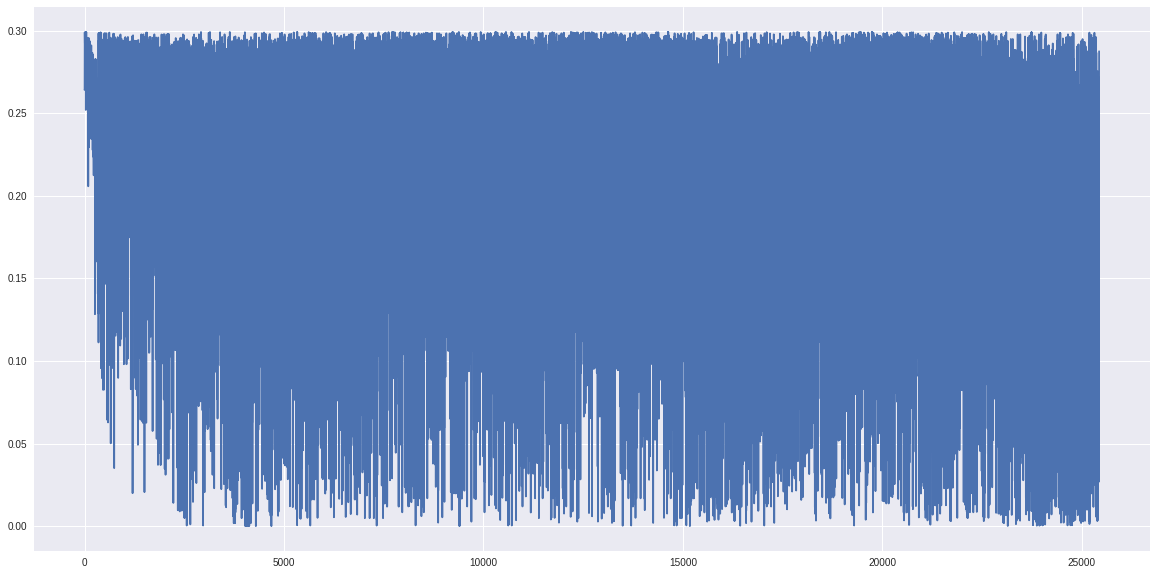

In [61]:
calibration_data.reset_index(drop=True,inplace=True)
calibration_data.parm.plot(figsize=(20,10))
#calibration_data.parlambda.plot(figsize=(20,10))

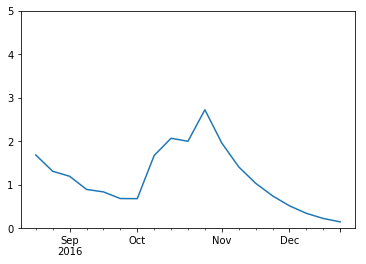

In [35]:
ensemble[i].I_adm1_w['Grande Anse'].plot(ylim=(0,5));

>>> Simulation done in  0.07939028739929199


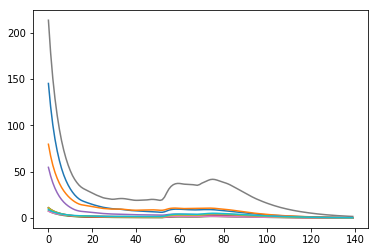

In [38]:
plt.plot(model.run().y[setup.i.I,:].T);

In [45]:
np.max(setup.geo.dist_road)

613.32138105144838

In [9]:
print(calibration_data.loc[calibration_data['like1'].idxmax(), 'parlambda'])
print(calibration_data.loc[calibration_data['like1'].idxmax(), 'parbeta_u'])

0.20508
0.036713


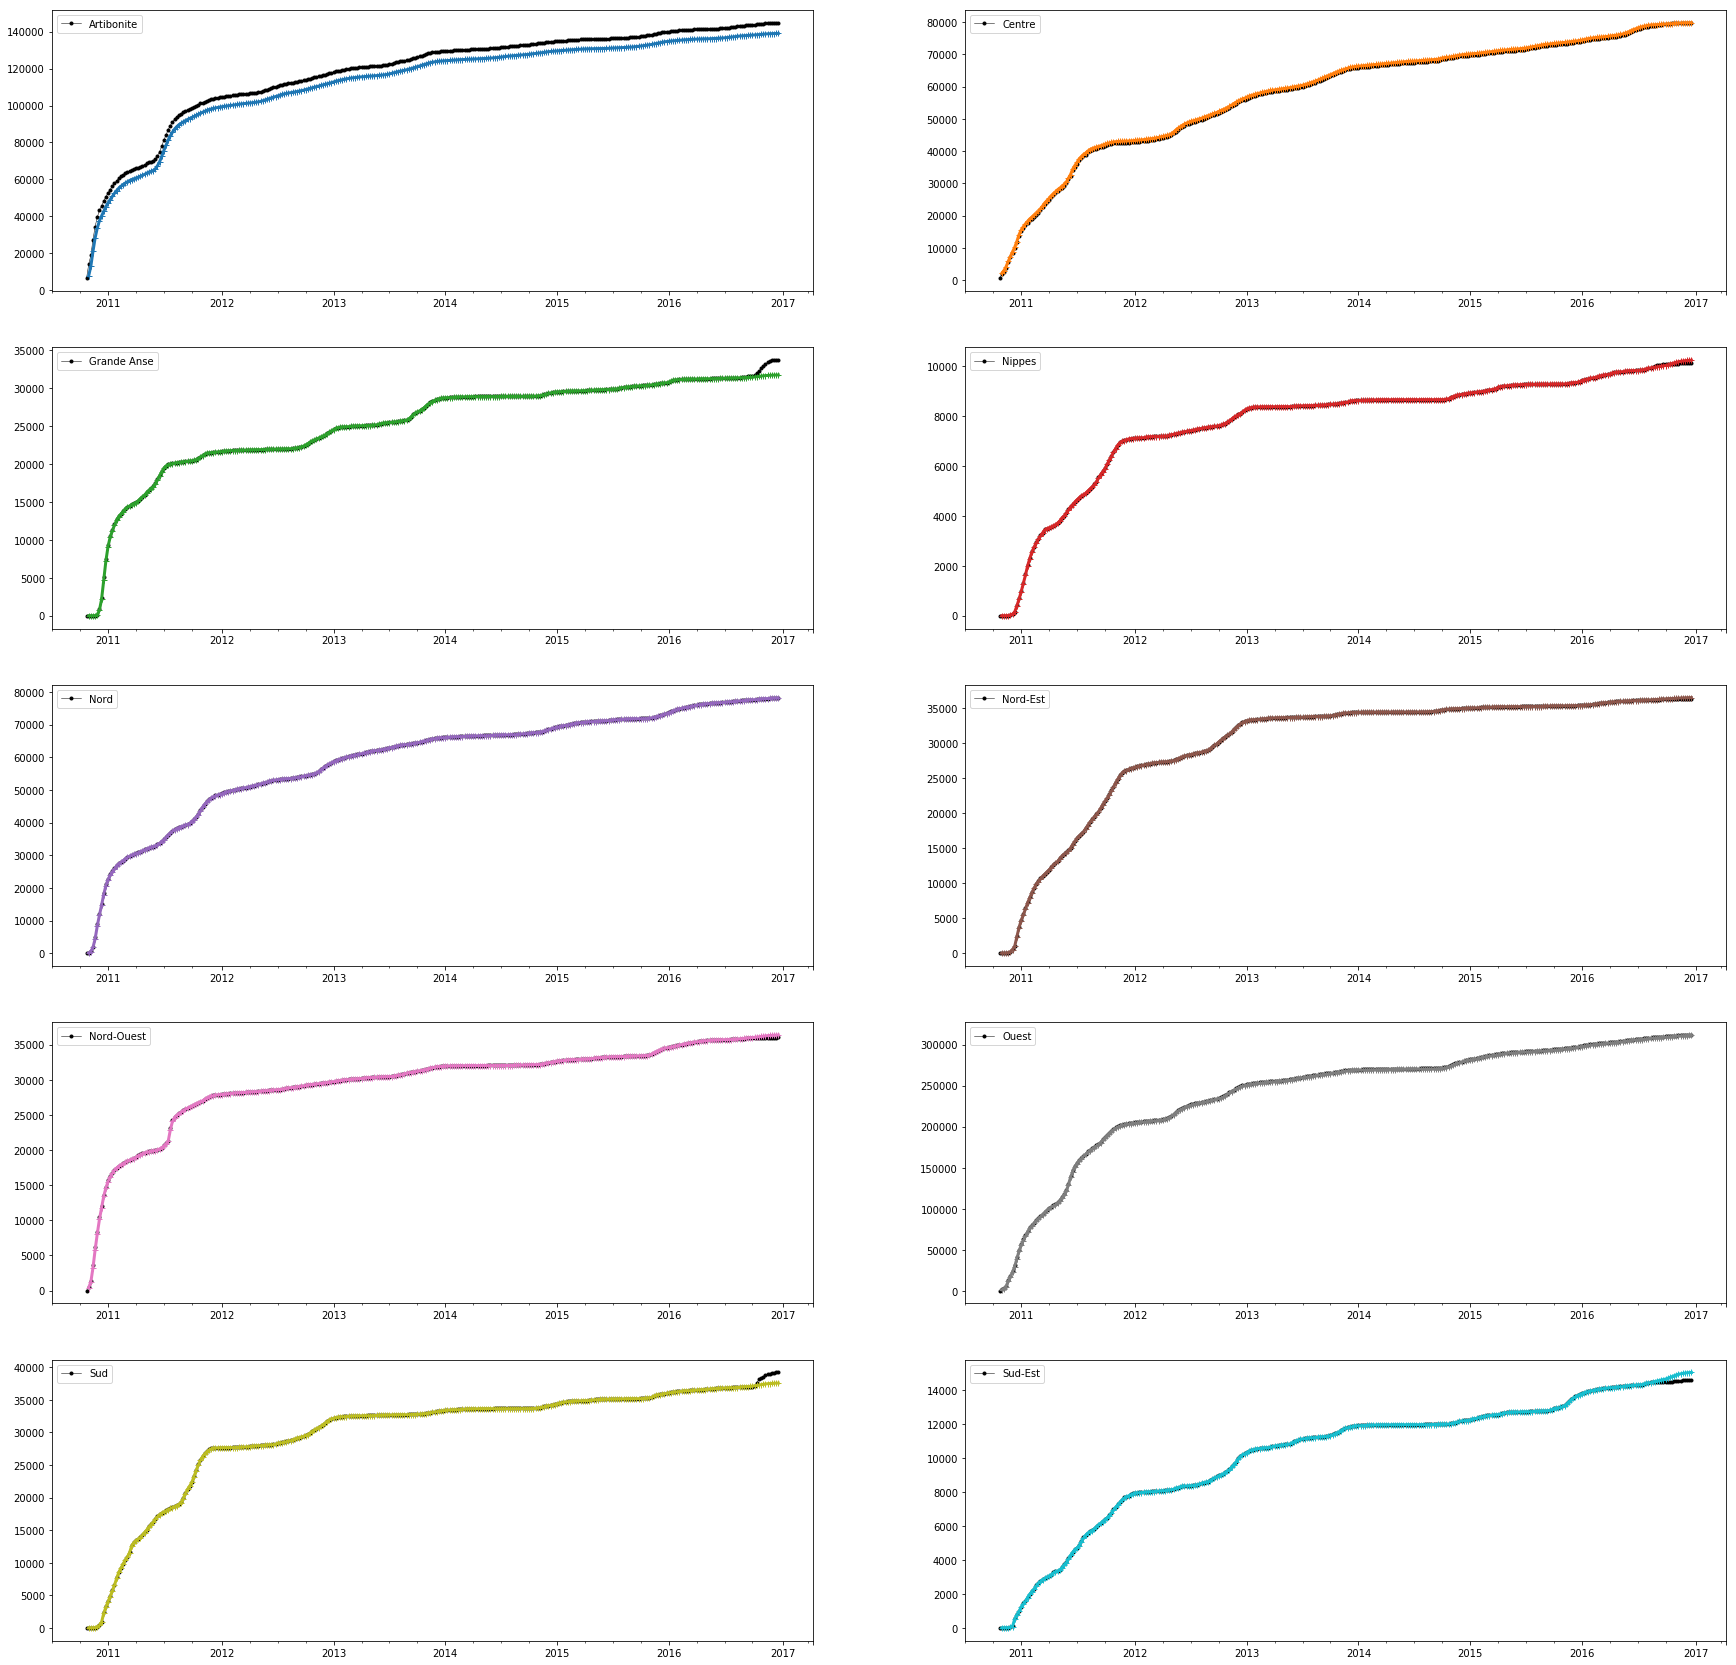

In [41]:
fig, axes = plt.subplots(5, 2, figsize=(30,30), squeeze = True);
axes = axes.flatten();
setup.cases_dept.cumsum().plot(subplots=True, style='k.-', ax=axes,linewidth=.5);

for i in range(n):
    ensemble[i].C_adm1_w[setup.t1i:setup.t2f].plot(subplots=True, ax=axes, legend=False, linewidth=3, style='+-');
    




I year for rho is short, so 4-5 yers

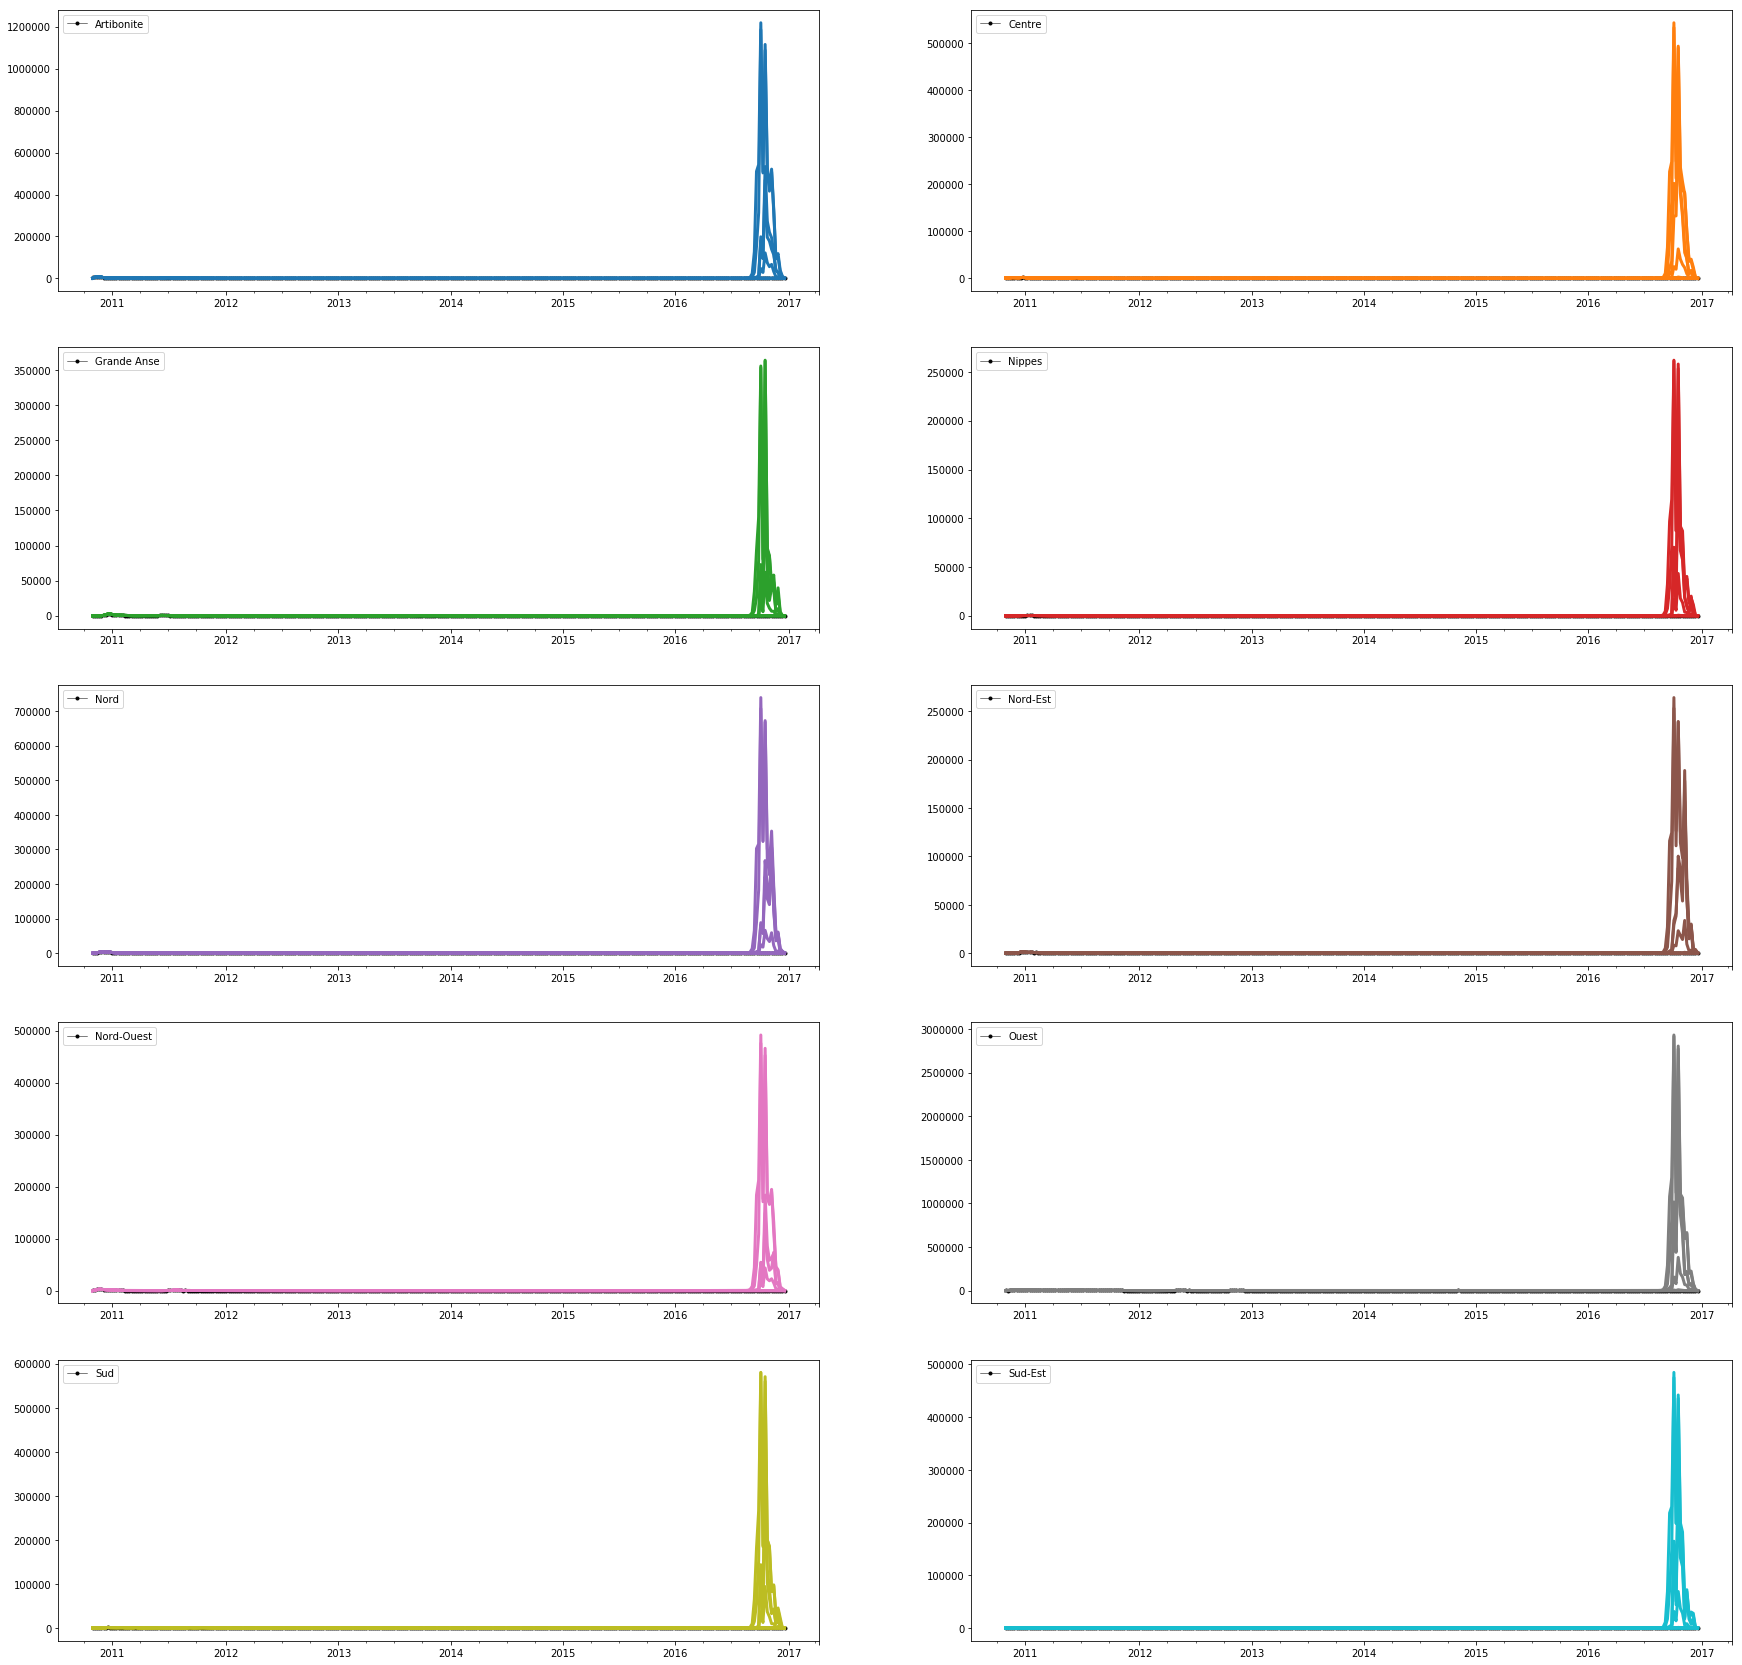

In [29]:
fig, axes = plt.subplots(5, 2, figsize=(30,30), squeeze = True);
axes = axes.flatten();

#axes_r = [axes[0],axes[1],axes[4],axes[5],axes[8],axes[9],axes[12],axes[13],axes[16],axes[17] ]
#axes_c = [axes[2],axes[3],axes[6],axes[7],axes[10],axes[11],axes[14],axes[15],axes[18],axes[19] ]
setup.cases_dept[setup.t1i:setup.t2f].plot(subplots=True, style='k.-', ax=axes,linewidth=.5);

for i in range(n):
    ensemble[i].I_adm1_w[setup.t1i:setup.t2f].plot(subplots=True, ax=axes, legend=False, linewidth=3);
    #ensemble[i].I.resample('W-SAT').sum().plot(subplots=True, ax=axes, legend=False, linewidth=3);


In [66]:
setup.fluxes

array([[ 0.        ,  0.11751293,  0.00042947,  0.0041336 ,  0.26549491,
         0.05398963,  0.1854495 ,  0.35358433,  0.00340802,  0.01599761],
       [ 0.20865496,  0.        ,  0.00064378,  0.00619628,  0.13367234,
         0.05870871,  0.02296908,  0.53822721,  0.00510864,  0.02581899],
       [ 0.0092908 ,  0.00727645,  0.        ,  0.12244897,  0.00197631,
         0.00078276,  0.00068821,  0.18939526,  0.63127175,  0.0368695 ],
       [ 0.0265019 ,  0.02075598,  0.06120071,  0.        ,  0.0056374 ,
         0.0022328 ,  0.00196311,  0.53380892,  0.2612534 ,  0.08664578],
       [ 0.40015165,  0.13190779,  0.00021251,  0.0020454 ,  0.        ,
         0.1456075 ,  0.12965245,  0.18025991,  0.00168637,  0.00847642],
       [ 0.21435601,  0.14989773,  0.00021289,  0.00204899,  0.39830418,
         0.        ,  0.04542596,  0.17948495,  0.00168933,  0.00857995],
       [ 0.54441198,  0.04925937,  0.00016255,  0.00156449,  0.23111324,
         0.03266174,  0.        ,  0.1335599 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b42b50f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f12aca44a90>], dtype=object)

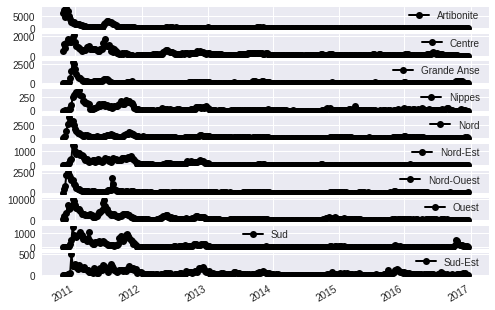

In [32]:
setup.cases.plot(label = 'Cases', 
                 marker = 'o', linestyle='-', color = 'k',linewidth = 2, subplots = True)